In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
'''
pip install numpy pandas matplotlib seaborn scikit-learn prophet
'''

pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c7/ef/925617d36c08e0bbdf4347a9b38974ce7ab8fdb5d1a5cf0e3f3c65ea43da/prophet-1.1.7-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/15/de/875f1d928c12336b6a700808e1d250e709cb140e19a9e44e9c66781a84e1/holidays-0.81-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/49.1 kB ? eta -:--:--
     ---------------------------------------- 49.1/49.1 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for importlib_resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
 

# fbprophet Demo
## Dataset: Air passengers (date and # of passengers), cleaned dataset from kaggle

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [8]:
# load
df = pd.read_csv("AirPassengers.csv")
df = df.rename(columns={"Month": "ds", "#Passengers": "y"})
df["ds"] = pd.to_datetime(df["ds"])  # ensure datetime format

In [9]:
print(df.head())
print(df.tail())
print(df[["y"]].describe())

          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121
            ds    y
139 1960-08-01  606
140 1960-09-01  508
141 1960-10-01  461
142 1960-11-01  390
143 1960-12-01  432
                y
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [11]:
# Rename columns to Prophet format
df = df.rename(columns={"Month": "ds", "#Passengers": "y"})
df["ds"] = pd.to_datetime(df["ds"])  # ensure datetime format
print(df.head())

          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


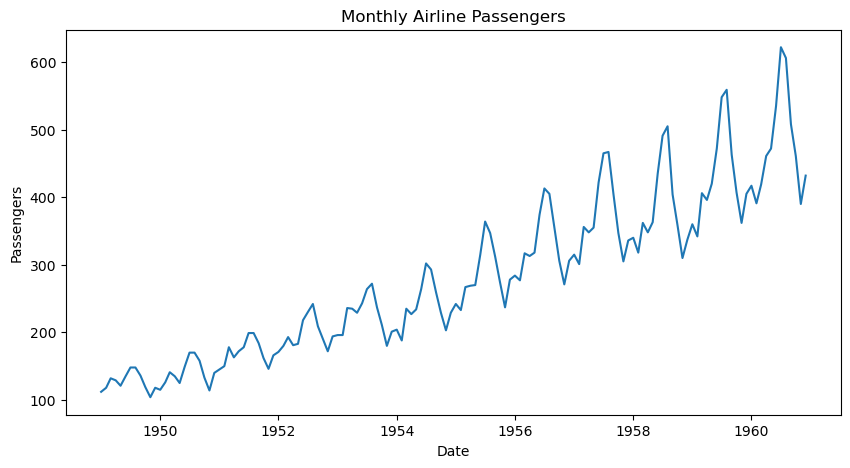

In [12]:
# exploration
plt.figure(figsize=(10,5))
plt.plot(df["ds"], df["y"])
plt.title("Monthly Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.show()

In [13]:
# create phrophet model
model = Prophet(yearly_seasonality=True, seasonality_mode="multiplicative")

In [14]:
# fit the model
model.fit(df)

13:44:03 - cmdstanpy - INFO - Chain [1] start processing
13:44:04 - cmdstanpy - INFO - Chain [1] done processing


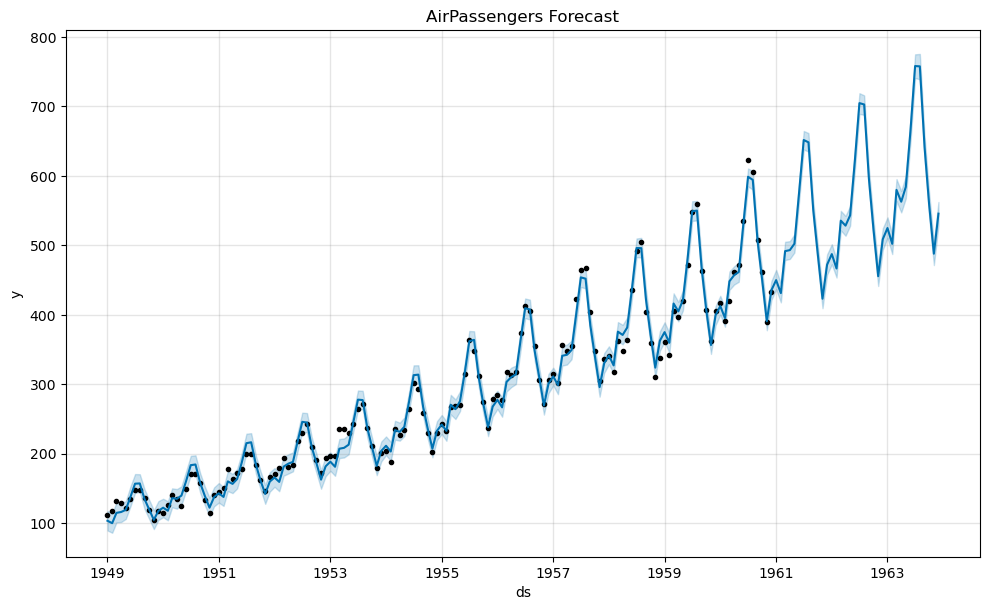

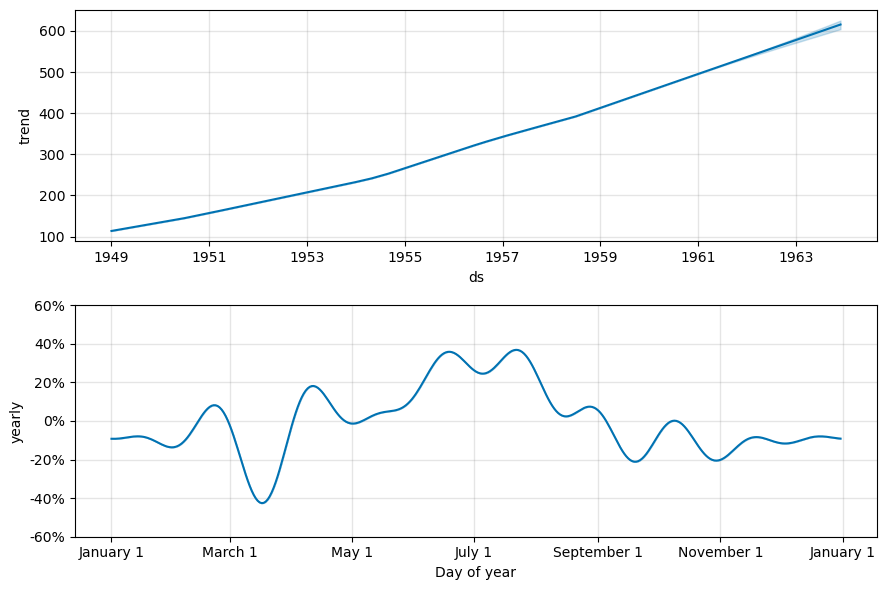

In [15]:
# predict future
future = model.make_future_dataframe(periods=36, freq="MS")  # MS = Month Start
forecast = model.predict(future)

# plot prediction
model.plot(forecast)
plt.title("AirPassengers Forecast")
plt.show()

# plot the trend + yearly seasonality based on month
model.plot_components(forecast)
plt.show()

In [ ]:
'''
# Optional: add extra seasonality with a 12-month period for monthly pattern emphasis
model.add_seasonality(name="monthly", period=365.25/12, fourier_order=5)

# predict future
future = model.make_future_dataframe(periods=36, freq="MS")  # MS = Month Start
forecast = model.predict(future)

# plot prediction
model.plot(forecast)
plt.title("AirPassengers Forecast")
plt.show()

# plot the trend + yearly seasonality based on month
model.plot_components(forecast)
plt.show()
'''